# Walmart Customer Purchase Analysis
## Exploratory Data Analysis, Statistical Testing & Machine Learning

### **Objective**
This project aims to:
- Analyze customer demographics and purchase behavior.  
- Identify spending patterns across gender, occupation, and age groups.  
- Build machine learning models to predict customer purchase amounts.  
- Use confidence intervals and statistical tests to validate insights.

### **Dataset Overview**
- **Data Source:** Walmart sales dataset  
- **Features:** Age, Gender, Occupation, City_Category, Marital_Status, Purchase  
- **Goal:** Understand how various customer demographics influence spending patterns.


In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t , sem
from scipy.stats import ttest_ind

In [300]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\walmart_data.csv")

In [301]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Null Values

In [303]:
df[df.isnull().any(axis =1)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [304]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [305]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Non-Graphical Analysis: Value counts and unique attributes ​

In [306]:
print("ValueCounts:")
print(df["Age"].value_counts())
print(df["Gender"].value_counts())
print(df["City_Category"].value_counts())
print(df["Stay_In_Current_City_Years"].value_counts())
print(df["Marital_Status"].value_counts())

ValueCounts:
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
Gender
M    414259
F    135809
Name: count, dtype: int64
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64
Marital_Status
0    324731
1    225337
Name: count, dtype: int64


Visual Analysis - Univariate & Bivariate:

Converting numerical datatype to categorical datatype

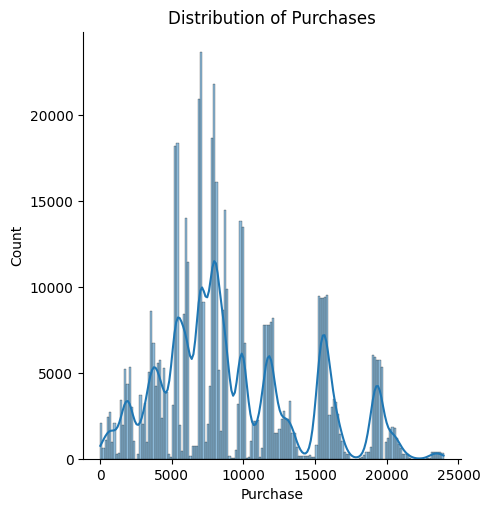

In [307]:
sns.displot(df["Purchase"], kde=True)
plt.title("Distribution of Purchases")
plt.show()

In [308]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [309]:
gender_purchase_total = df.groupby("Gender")["Purchase"].sum()

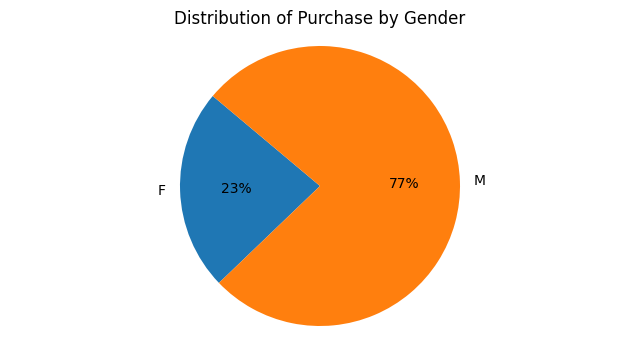

In [310]:
plt.figure(figsize=(8,4))
plt.pie(gender_purchase_total, labels=gender_purchase_total.index , autopct='%.0f%%', startangle=140)
plt.title("Distribution of Purchase by Gender")
plt.axis("equal")
plt.show()

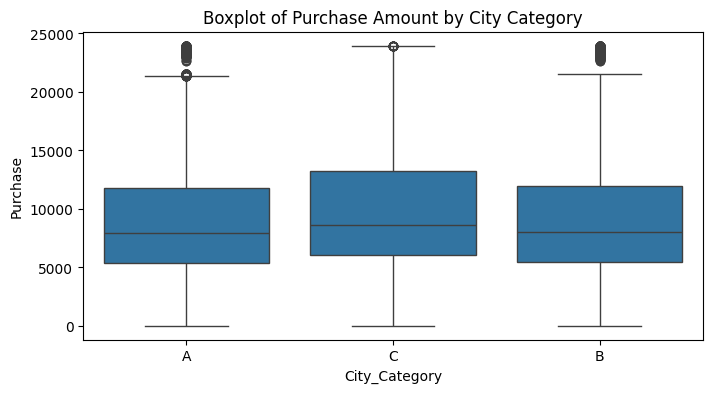

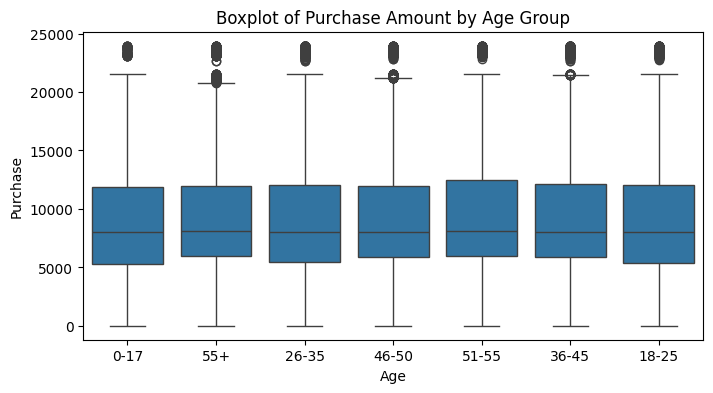

In [311]:
plt.figure(figsize=(8,4))
sns.boxplot( data=df, x="City_Category", y="Purchase")
plt.title('Boxplot of Purchase Amount by City Category')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot( data=df, x="Age", y="Purchase")
plt.title('Boxplot of Purchase Amount by Age Group')
plt.show()

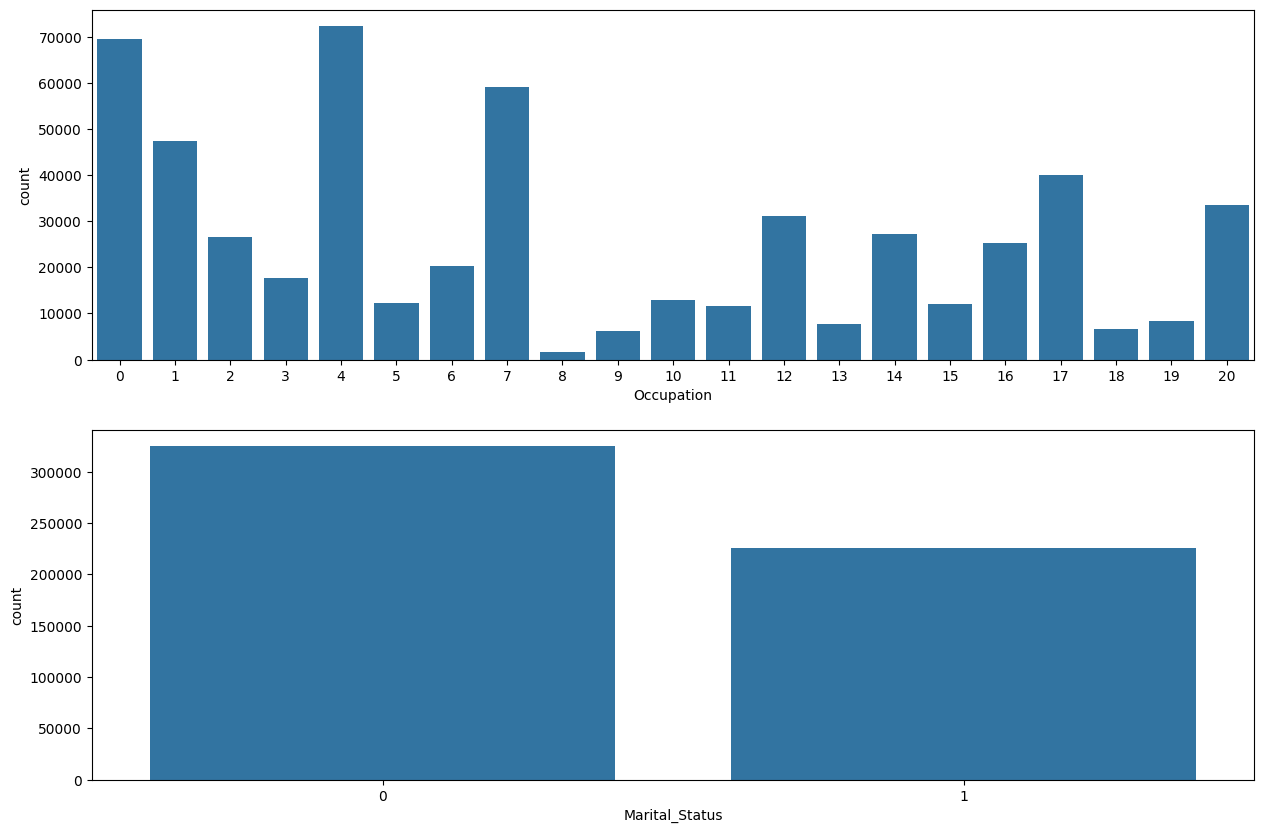

In [312]:
fig, axs = plt.subplots(nrows=2, figsize=(15, 10))
sns.countplot(df, x="Occupation", ax=axs[0])
sns.countplot(df, x="Marital_Status", ax=axs[1])
plt.show()

In [313]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [314]:
df[['Occupation'  , 'Product_Category']] = df[['Occupation'  , 'Product_Category']].astype('object')
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category              object
Purchase                       int64
dtype: object

Outliers

In [315]:
continuous_varibales = df.select_dtypes(include=['int64','float64']).columns

In [316]:
continuous_varibales

Index(['User_ID', 'Marital_Status', 'Purchase'], dtype='object')

<Axes: xlabel='Purchase'>

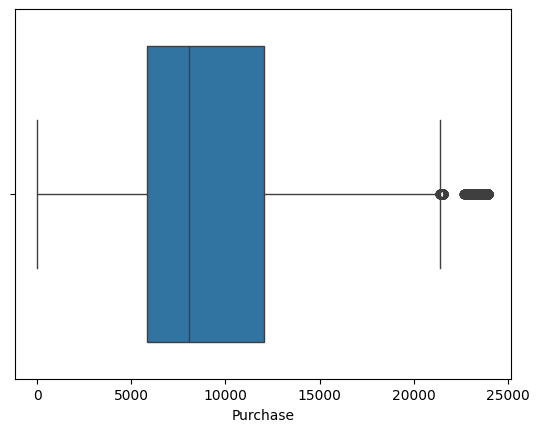

In [317]:
sns.boxplot(data=df, x = df['Purchase'])

In [318]:
outlier = []
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    Lower_fence = Q1 - 1.5*IQR
    Upper_fence = Q3 + 1.5*IQR

    is_outlier = (data>Upper_fence) | (data<Lower_fence)
    outlier = data[is_outlier]
    print(Lower_fence,Upper_fence)

    return outlier

In [319]:
detect_outliers(df['Purchase'])

-3523.5 21400.5


343       23603
375       23792
652       23233
736       23595
1041      23341
          ...  
544488    23753
544704    23724
544743    23529
545663    23663
545787    23496
Name: Purchase, Length: 2677, dtype: int64

np.clip

In [320]:
percentile_5 = df['Purchase'].quantile(0.05)
percentile_95 = df['Purchase'].quantile(0.95)

In [321]:
df['Purchase'] = np.clip(df['Purchase'], percentile_5 , percentile_95)

In [322]:
detect_outliers(df["Purchase"])

-3523.5 21400.5


Series([], Name: Purchase, dtype: int64)

## Data Cleaning Summary
- **Null Values:** Removed missing entries and confirmed no remaining null values.  
- **Outliers:** Detected and treated using **IQR** and **percentile capping**.  
- **Data Types:** Converted relevant columns to categorical datatypes.  
- **Validation:** The data is now ready for exploratory analysis and statistical modeling.

## Data Exploration - EDA
 - Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

In [323]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [324]:
male = df[df["Gender"] == "M"]
female = df[df["Gender"] == "F"]

In [325]:
#Calculating the avg spending for male and female
avg_spends_male = male['Purchase'].mean()
avg_spends_female = female['Purchase'].mean()
print(f'Average spendings Male : {avg_spends_male}\nAverage spendings Female : {avg_spends_female}')

Average spendings Male : 9427.240996574606
Average spendings Female : 8736.540266109021


**Calculating Confidence Intervals**

In [326]:
std_male = male['Purchase'].std()
std_female = female['Purchase'].std()

print(f"The Standard deviation for male customers is:{std_male}\n& Standard deviation for female customers is:{std_female}")

The Standard deviation for male customers is:4925.953492284638
& Standard deviation for female customers is:4596.98461352269


In [327]:
#Calculating sample size
sample_male = len(male)
sample_female = len(female) 

print(f'Sample size for male customers:{sample_male} , female customers: {sample_female}')

Sample size for male customers:414259 , female customers: 135809


In [328]:
#Calculating the standard error 
se_male = std_male / np.sqrt(sample_male)
se_female = std_female / np.sqrt(sample_female)
print(f"The SE for Male is:{se_male}, Female is:{se_female}")

The SE for Male is:7.653398570983641, Female is:12.474087164948806


In [329]:
#Set the confident level (95%)
confidence_level = 0.95

In [330]:
#Calculating the margin of error using the z-score
z_score = norm.ppf((1+ confidence_level)/2)
z_score

np.float64(1.959963984540054)

In [331]:
margin_error_male = z_score * se_male
margin_error_female = z_score * se_female

In [332]:
CI_male = (avg_spends_male - margin_error_male, avg_spends_male + margin_error_male)
CI_female = (avg_spends_female - margin_error_female, avg_spends_female + margin_error_female)

print('95% Confidence Interval for average spending of male customers:', CI_male)
print('95% Confidence Interval for average spending of female customers:', CI_female)

95% Confidence Interval for average spending of male customers: (np.float64(9412.240611016148), np.float64(9442.241382133065))
95% Confidence Interval for average spending of female customers: (np.float64(8712.091504525708), np.float64(8760.989027692334))


**What products are different age groups buying?**

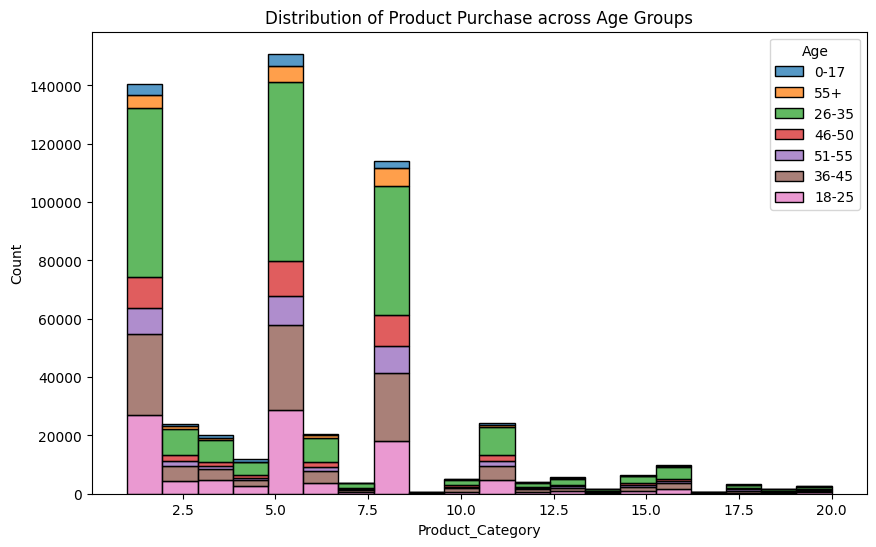

In [333]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Product_Category", hue="Age", multiple="stack", bins=20)
plt.title("Distribution of Product Purchase across Age Groups")
plt.show()


**Is there a relationship between age, marital status, and the amount spent?**

In [334]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [335]:
grouped_data = df.groupby(['Age','Marital_Status'])["Purchase"].mean().reset_index()
grouped_data

,Age,Marital_Status,Purchase
0,0-17,0,8940.649053
1,18-25,0,9215.764183
2,18-25,1,8995.105702
3,26-35,0,9242.877723
4,26-35,1,9245.174074
5,36-45,0,9393.742155
6,36-45,1,9215.193533
7,46-50,0,8951.386840
8,46-50,1,9301.401654
9,51-55,0,9545.115509


In [336]:
heatmap_data = grouped_data.pivot_table(index="Age", columns="Marital_Status", values="Purchase")

<Axes: xlabel='Marital_Status', ylabel='Age'>

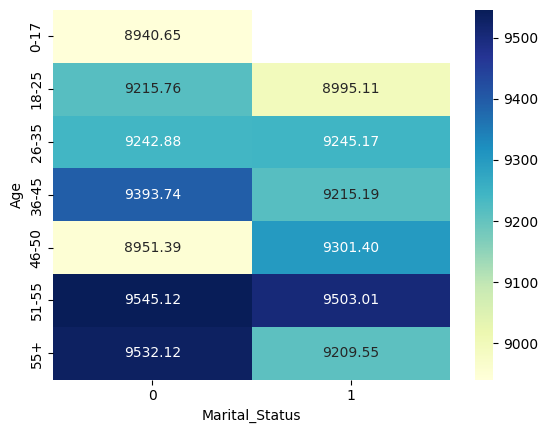

In [337]:
sns.heatmap(data=heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")

**Purchase Distribution by Marital Status & Gender**

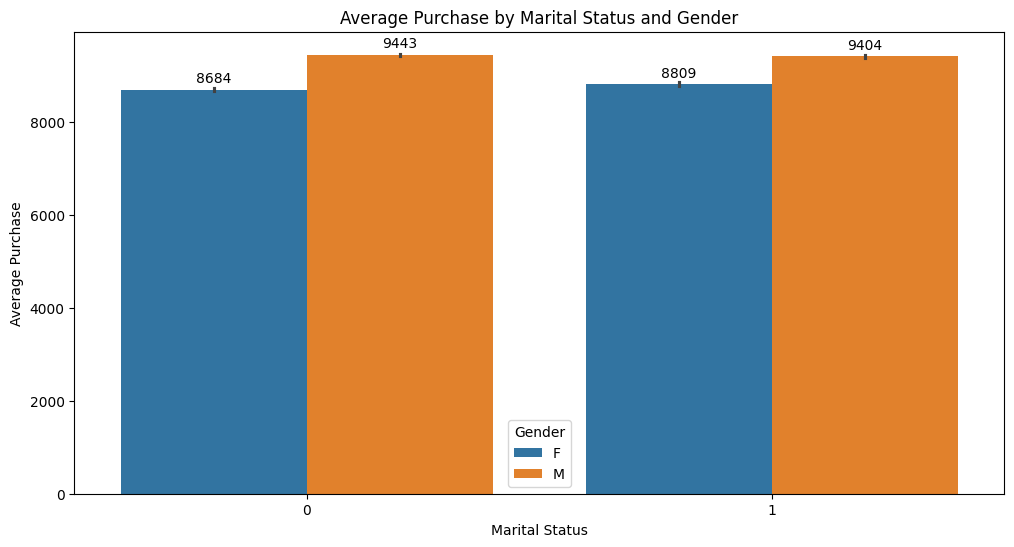

In [338]:
plt.figure(figsize=(12, 6))

# Purchase by Marital Status and Gender
ax = sns.barplot(data=df, x='Marital_Status', y='Purchase', hue='Gender')
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge",fontsize=10, color="black", padding=3)
plt.title('Average Purchase by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel('Average Purchase')
plt.show()


**What is the distribution of Product category preference by Gender**

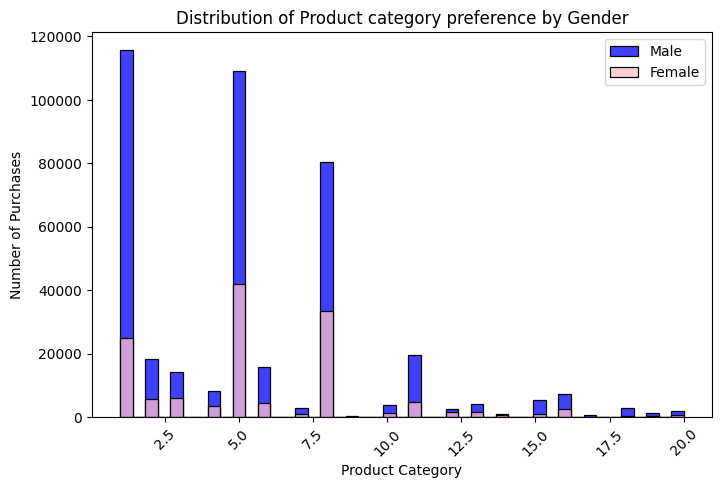

In [339]:
plt.figure(figsize=(8,5))
sns.histplot(data=df[df['Gender']=='M'],x="Product_Category",stat="count", label="Male", color="Blue", bins=45)
sns.histplot(data=df[df['Gender']=='F'],x="Product_Category",stat="count", label="Female", color="Pink", bins=45)
plt.title("Distribution of Product category preference by Gender")
plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Top 10 customers by purchase amount**

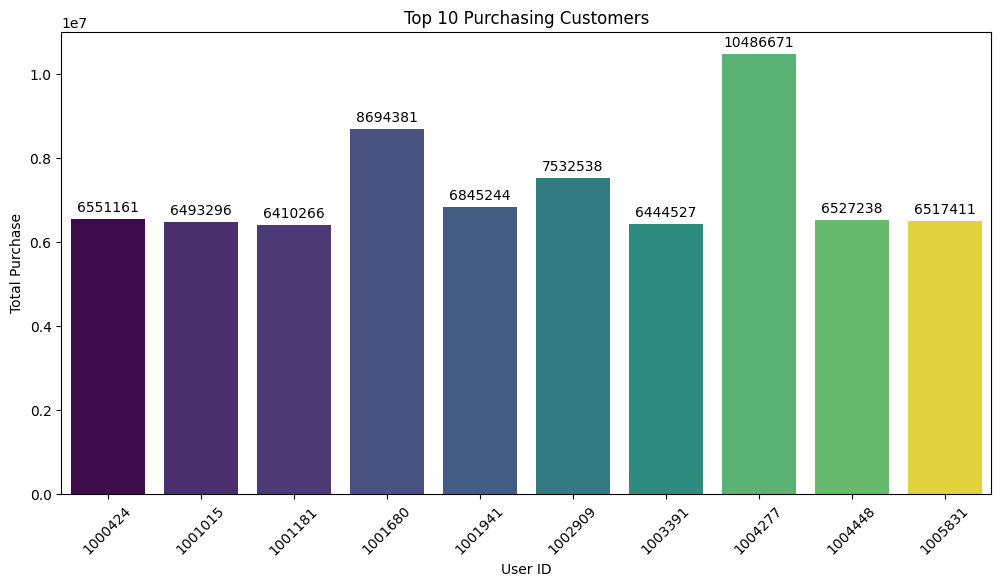

In [340]:
top_customers = df.groupby('User_ID')['Purchase'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_customers, x='User_ID', y='Purchase', hue="User_ID", palette='viridis', legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type='edge', fontsize=10, color='black', padding=3)
plt.title('Top 10 Purchasing Customers')
plt.xlabel('User ID')
plt.ylabel('Total Purchase')
plt.xticks(rotation=45)
plt.show()


**How does gender affect the amount spent**

**Confidence Intervals (CIs)**
**Purpose of Confidence Intervals**
- Confidence intervals estimate the range of values that are likely to contain the **true population mean**.
- **95% Confidence Level:** 95% confident that the true mean lies within the calculated CI range.  
- **Bootstrapping Method:** Random sampling with replacement to estimate the CIs.


In [341]:
def compute_CI(data,sample_size):
    sample_mean=[]
    for i in range(1000):
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_mean.append(np.mean(sample))


    mean_boot = np.mean(sample_mean)
    std_err_boot = np.std(sample_mean)

    conf_level = 0.95
    z_score = norm.ppf((1+conf_level)/2)
    lower_ci = mean_boot - z_score * std_err_boot
    upper_ci = mean_boot + z_score * std_err_boot

    return lower_ci, upper_ci

sample_size = [len(df),300,3000]
gender_ci = {}

for size in sample_size:
    sample_data = df['Purchase'].sample(size, replace=True)
    male_data = sample_data[df['Gender']=='M']
    female_data = sample_data[df['Gender']=='F']

    lower_ci_male, upper_ci_male = compute_CI(male_data, size)
    lower_ci_female, upper_ci_female = compute_CI(female_data, size)

    gender_ci[size] = {
        'Male': (lower_ci_male, upper_ci_male),
        'Female': (lower_ci_female, upper_ci_female)
    }

for size, ci in gender_ci.items():
    print(f"The sample size: {size}")
    print(f"The Male CI: {ci['Male']}")
    print(f"The Female CI: {ci['Female']}") 

The sample size: 550068
The Male CI: (np.float64(9410.32979513027), np.float64(9436.607787354074))
The Female CI: (np.float64(8744.272412976903), np.float64(8769.35663125399))
The sample size: 300
The Male CI: (np.float64(8850.515493451254), np.float64(9978.728719882078))
The Female CI: (np.float64(7891.226035575176), np.float64(9030.791391091494))
The sample size: 3000
The Male CI: (np.float64(9061.05149908312), np.float64(9405.14221091688))
The Female CI: (np.float64(8753.466220418159), np.float64(9089.557452248511))



***i. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?***

Yes, the confidence interval computed using the entire dataset is wider for males compared to females. This could be due to several reasons, including:
Variability in purchase amounts: If there is higher variability (more spread out data) in the purchase amounts for males compared to females, it can result in a wider confidence interval.

***ii. How is the width of the confidence interval affected by the sample size?***

As the sample size increases, the width of the confidence interval generally decreases. This is because larger sample sizes provide more information and reduce the uncertainty in estimating the population mean. In your output, you can observe that as the sample size increases from 300 to 3000, the width of the confidence intervals for both genders decreases.

***iii. Do the confidence intervals for different sample sizes overlap?***

Yes, the confidence intervals for different sample sizes overlap.

***iv. How does the sample size affect the shape of the distributions of the means?***

Increasing the sample size tends to make the distribution of sample means more closely resemble a normal distribution. This is a key principle of the central limit theorem (CLT). As sample size increases, the means of random samples drawn from the population tend to follow a normal distribution.